In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import pickle

In [2]:
def save_model(w1, b1, w2, b2, filename):
    with open(filename, 'wb') as f:
        pickle.dump((w1, b1, w2, b2), f)

def load_model(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [3]:
train_data = pd.read_csv('../MNIST CSV archive/mnist_train.csv')
train_data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train_data = np.array(train_data)
m, n = train_data.shape
np.random.shuffle(train_data)

In [4]:
train_data = np.array(train_data)
m, n = train_data.shape
np.random.shuffle(train_data)

train_data = train_data[0:m].T
Y_train = train_data[0] 
X_train = train_data[1:n]
X_train = X_train / 255

In [5]:
Y_train.size

60000

In [6]:
X_train.shape

(784, 60000)

In [7]:
def init_params():
    w1 = np.random.rand(32, 784) - .5
    b1 = np.zeros((32,1)) -.5
    w2 = np.random.rand(10, 32) - .5
    b2 = np.zeros((10,1)) - .5
    return w1, b1, w2, b2

In [8]:
def relu(z): #ReLU
    return np.maximum(z,0) # np.maximum(z,0) is ReLU

def softmax(z): #Softmax
    return np.exp(z)/ sum(np.exp(z))

In [9]:
#Forward function
def forward(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1  # calculates weighted sum.
    a1 = relu(z1) # non-linearity per relu function
    z2 = w2.dot(a1) + b2 # calculates weighted sum
    a2 = softmax(z2) # non-linearity per softmax function, for final output
    return z1, a1, z2, a2

In [10]:
#Derivative of ReLU
def relu_deriv(z):
    return z > 0

In [11]:
#One hot encoding of our data
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [12]:
#Categorical Cross Entropy to calculate loss
def cat_cross_entropy(one_hot_Y, a2 ):
    CCE = -np.sum(one_hot_Y * np.log(a2)) * 1/m
    return CCE

In [13]:
def back_prop(z1, a1, z2, a2, w1, w2, X, Y):
    one_hot_Y = one_hot(Y)
    dz2 = a2 - one_hot_Y
    dw2 = dz2.dot(a1.T) * 1/m
    db2 = np.sum(dz2) * 1/m
    dz1 = relu_deriv(z1) * w2.T.dot(dz2)
    dw1 = dz1.dot(X.T) * 1/m
    db1 = np.sum(dz1) * 1/m
    return dw1, db1, dw2, db2

In [14]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [15]:
def get_pred(a2):
    pred = np.argmax(a2, axis = 0)
    return pred

In [16]:
def accuracy(predictions, Y):
    acc = np.sum(predictions == Y) / Y.size
    return acc

In [17]:
def gradient_descent(X, Y, alpha, iterations):
# loading model
    model_filename = '../models/mnistnn.pkl'
    try: 
        w1, b1, w2, b2 = load_model(model_filename)
        print("Loaded model from:", model_filename)
    except FileNotFoundError:
        print("Model not found. Initializing new model!")
        w1, b1, w2, b2 = init_params()
#gradient descent
    for i in range(iterations):
        z1, a1, z2, a2 = forward(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha )
        if i % 10 == 0:
            loss = cat_cross_entropy(one_hot(Y), a2)
            predictions = get_pred(a2)
            acc = accuracy(predictions, Y)
            print("Iteration: ", i)
            print("Accuracy:", acc)
            print("Loss:", loss)
            print(predictions, Y)
    return w1, b1, w2, b2

In [18]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train ,.1, 500)
save_model(w1, b1, w2, b2, '../models/mnistnn.pkl')

Loaded model from: ../models/mnistnn.pkl
Iteration:  0
Accuracy: 0.8794333333333333
Loss: 0.3998332065365737
[9 8 3 ... 6 9 2] [9 8 7 ... 6 9 2]
Iteration:  10
Accuracy: 0.8802166666666666
Loss: 0.39703362769161266
[9 8 3 ... 6 9 2] [9 8 7 ... 6 9 2]
Iteration:  20
Accuracy: 0.8812166666666666
Loss: 0.39430768255036397
[9 8 3 ... 6 9 2] [9 8 7 ... 6 9 2]
Iteration:  30
Accuracy: 0.8822166666666666
Loss: 0.39165449605509606
[9 8 3 ... 6 9 2] [9 8 7 ... 6 9 2]
Iteration:  40
Accuracy: 0.8829166666666667
Loss: 0.38907225598372863
[9 8 3 ... 6 9 2] [9 8 7 ... 6 9 2]
Iteration:  50
Accuracy: 0.8837666666666667
Loss: 0.38655439774052247
[9 8 3 ... 6 9 2] [9 8 7 ... 6 9 2]
Iteration:  60
Accuracy: 0.8847833333333334
Loss: 0.3841019414315645
[9 8 3 ... 6 9 2] [9 8 7 ... 6 9 2]
Iteration:  70
Accuracy: 0.8853
Loss: 0.3817099600064289
[9 8 3 ... 6 9 2] [9 8 7 ... 6 9 2]
Iteration:  80
Accuracy: 0.8858666666666667
Loss: 0.37937519476819015
[9 8 3 ... 6 9 2] [9 8 7 ... 6 9 2]
Iteration:  90
Accura

In [19]:
test_data = pd.read_csv("../MNIST CSV archive/mnist_test.csv")
test_data = np.array(test_data)
m, n = test_data.shape # 10000, 784

test_data = test_data[0:m].T # Now in form where each column == individual digits | 784, 10000
Y_test = test_data[0] # Taking the entire first row, holding labels of all 10k digits | 10000,
X_test = test_data[1:n] # Taking the rows from index 1 to the 10000, holding all the data | 9999, 784
X_test = X_test / 255

In [20]:
nn = '../models/mnistnn.pkl'
w1, b1, w2, b2 = load_model(nn)

In [21]:
def make_pred(w1, b1, w2, b2, X, i):
    _, _, _, a2 = forward(w1, b1, w2, b2, X)
    prediction = get_pred(a2)
    prediction = prediction[i]
    true_digit = Y_test[i]
    print(f'Prediction: {prediction}')
    print(f"True Digit: {true_digit}")

    digit = X_test[:, i]
    digit = digit.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(digit)
    plt.show()
    return

Prediction: 7
True Digit: 7


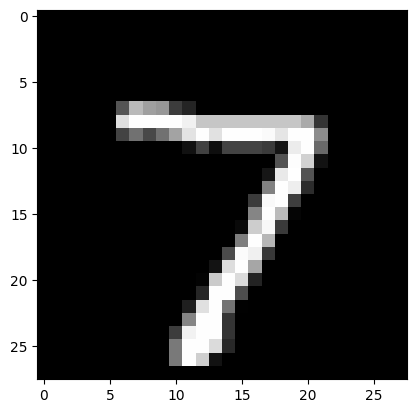

In [22]:
prediction = make_pred(w1, b1, w2, b2, X_test, 0)